<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setting" data-toc-modified-id="Setting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setting</a></span><ul class="toc-item"><li><span><a href="#Path" data-toc-modified-id="Path-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Path</a></span></li><li><span><a href="#dtype" data-toc-modified-id="dtype-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>dtype</a></span></li><li><span><a href="#read_csv" data-toc-modified-id="read_csv-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>read_csv</a></span></li></ul></li><li><span><a href="#時間単位に丸める" data-toc-modified-id="時間単位に丸める-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>時間単位に丸める</a></span></li><li><span><a href="#Datetime" data-toc-modified-id="Datetime-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Datetime</a></span><ul class="toc-item"><li><span><a href="#click-counts" data-toc-modified-id="click-counts-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>click counts</a></span><ul class="toc-item"><li><span><a href="#plot" data-toc-modified-id="plot-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>plot</a></span></li></ul></li><li><span><a href="#prop_downloaded" data-toc-modified-id="prop_downloaded-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>prop_downloaded</a></span><ul class="toc-item"><li><span><a href="#plot" data-toc-modified-id="plot-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>plot</a></span></li></ul></li></ul></li><li><span><a href="#time" data-toc-modified-id="time-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>time</a></span><ul class="toc-item"><li><span><a href="#click" data-toc-modified-id="click-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>click</a></span><ul class="toc-item"><li><span><a href="#plot" data-toc-modified-id="plot-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>plot</a></span></li></ul></li><li><span><a href="#prop_downloaded" data-toc-modified-id="prop_downloaded-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>prop_downloaded</a></span><ul class="toc-item"><li><span><a href="#plot" data-toc-modified-id="plot-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>plot</a></span></li></ul></li></ul></li><li><span><a href="#IP" data-toc-modified-id="IP-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>IP</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#proportion" data-toc-modified-id="proportion-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>proportion</a></span><ul class="toc-item"><li><span><a href="#load-proportion" data-toc-modified-id="load-proportion-5.0.1.1"><span class="toc-item-num">5.0.1.1&nbsp;&nbsp;</span>load proportion</a></span></li></ul></li><li><span><a href="#counts" data-toc-modified-id="counts-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>counts</a></span><ul class="toc-item"><li><span><a href="#load-counts" data-toc-modified-id="load-counts-5.0.2.1"><span class="toc-item-num">5.0.2.1&nbsp;&nbsp;</span>load counts</a></span></li></ul></li><li><span><a href="#Head" data-toc-modified-id="Head-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>Head</a></span></li></ul></li><li><span><a href="#Merge" data-toc-modified-id="Merge-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Merge</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plot</a></span></li></ul></li></ul></div>

# eda_with_dask__time_pattern <a class='tocSkip'>

In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import dask.dataframe as dd

%matplotlib inline

# Setting

## Path

In [2]:
HOME_PATH = Path(os.getcwd()).parent
dire = str(HOME_PATH)
print(os.path.exists(dire))
print(dire)
    
data_Path = HOME_PATH / "data"
dire = str(data_Path)
print(os.path.exists(dire))
print(dire)

raw_data_Path = data_Path / "raw"
dire = str(raw_data_Path)
print(os.path.exists(dire))
print(dire)

train_csv_Path = raw_data_Path / "train.csv"
dire = str(train_csv_Path)
print(os.path.exists(dire))
print(dire)

train_sample_csv_Path = raw_data_Path / "train_sample.csv"
dire = str(train_sample_csv_Path)
print(os.path.exists(dire))
print(dire)

test_csv_Path = raw_data_Path / "test.csv"
dire = str(test_csv_Path)
print(os.path.exists(dire))
print(dire)

interim_data_Path = data_Path / "interim"
dire = str(interim_data_Path)
print(os.path.exists(dire))
print(dire)


True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge
True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data
True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/raw
True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/raw/train.csv
True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/raw/train_sample.csv
True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/raw/test.csv
True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/interim


## dtype

In [3]:
dtypes = {
    "ip" : "uint32",
    "app" : "uint16",
    "device" : "uint16",
    "os" : "uint16",
    "channel" : "uint16",
    "is_attributed" : "uint8",
}

## read_csv
必要最低限のdata型を指定してやるとメモリを節約ができるのでここでもちゃんと指定しています。
読み込んでいます。

In [4]:
df_train = dd.read_csv(urlpath=str(train_csv_Path),
                       #blocksize=3*64000000,
                       dtype=dtypes,
                       parse_dates=["click_time", "attributed_time"],
                      )

In [5]:
df_train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaT,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaT,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaT,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaT,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaT,0


In [6]:
# 118個に分割されていることがわかります。
df_train.npartitions

118

# 時間単位に丸める
最も近い時間に丸める

In [7]:
df_train["click_rnd"] = df_train["click_time"].dt.round('H')

In [8]:
df_train.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed', 'click_rnd'],
      dtype='object')

# Datetime

日付と時刻（時間単位）に対するクリック数

In [9]:
section = "datetime"

## click counts

In [10]:
fea = "click_rnd"

In [53]:
click_counts = df_train[[fea,"is_attributed"]].groupby(by=fea).count().reset_index()
click_counts.columns = [fea, "click_counts"]

In [11]:
click_counts.head()

,click_rnd,is_attributed
0,2017-11-06 15:00:00,83
1,2017-11-06 16:00:00,1312093
2,2017-11-06 17:00:00,1728211
3,2017-11-06 18:00:00,943727
4,2017-11-06 19:00:00,599021


In [54]:
%%time
# save
click_counts.to_csv(filename=str(interim_data_Path / ("train_" + section + fea+"_" + "_click_counts-*.csv")),
                    index=False,
                   )

CPU times: user 7min 31s, sys: 27.6 s, total: 7min 58s
Wall time: 4min 38s


['/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/interim/train_datetimeclick_rnd__click_counts-0.csv']

### plot

In [56]:
click_counts = pd.read_csv(filepath_or_buffer=str(interim_data_Path / ("train_" + section + fea+"_" + "_click_counts-0.csv")),
                           index_col=0,
                           parse_dates=[fea],
                          )

In [57]:
click_counts.head()

,click_counts
click_rnd,
2017-11-06 15:00:00,83
2017-11-06 16:00:00,1312093
2017-11-06 17:00:00,1728211
2017-11-06 18:00:00,943727
2017-11-06 19:00:00,599021


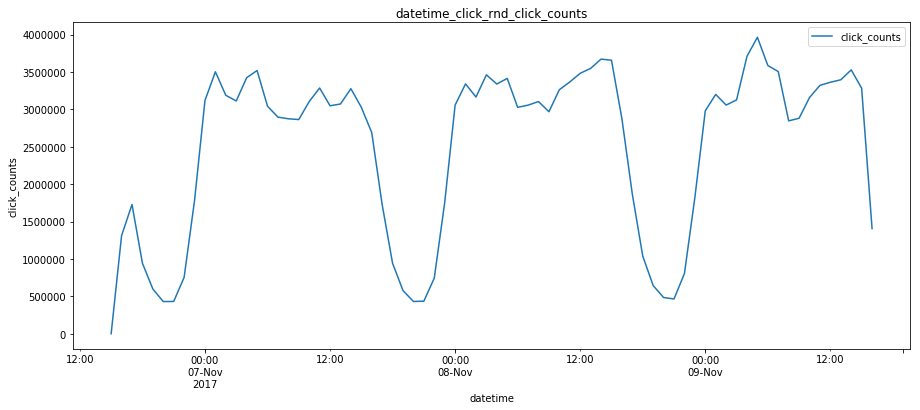

In [58]:
# plot
title = section + "_" + fea + "_click_counts"

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 1, 1)
click_counts[["click_counts"]].plot(ax=ax1)
ax1.set_ylabel(ylabel="click_counts")
ax1.set_xlabel(xlabel="datetime")

ax1.set_title(label=title)
fig.savefig(fname=str(data_Path / "plot" / title))

## prop_downloaded

In [11]:
prop_downloaded = df_train[[fea,"is_attributed"]].groupby(by=fea).mean().reset_index()

In [12]:
prop_downloaded.columns = [fea, "prop_downloaded"]

In [13]:
prop_downloaded.head()

,click_rnd,prop_downloaded
0,2017-11-06 15:00:00,0.000000
1,2017-11-06 16:00:00,0.001713
2,2017-11-06 17:00:00,0.001695
3,2017-11-06 18:00:00,0.001837
4,2017-11-06 19:00:00,0.001873


In [14]:
%%time
# save
prop_downloaded.to_csv(filename=str(interim_data_Path / ("train_"+section+"_"+fea+"_isAttributed_proportion-*.csv")),
                       index=False,
                      )

CPU times: user 7min 12s, sys: 26.1 s, total: 7min 38s
Wall time: 4min 27s


['/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/interim/train_datetime_click_rnd_isAttributed_proportion-0.csv']

### plot

In [15]:
prop_downloaded = pd.read_csv(filepath_or_buffer=str(interim_data_Path / ("train_"+section+"_"+fea+"_isAttributed_proportion-0.csv")),
                              index_col=0,
                              parse_dates=[fea],
                             )

In [16]:
prop_downloaded.head()

,prop_downloaded
click_rnd,
2017-11-06 15:00:00,0.000000
2017-11-06 16:00:00,0.001713
2017-11-06 17:00:00,0.001695
2017-11-06 18:00:00,0.001837
2017-11-06 19:00:00,0.001873


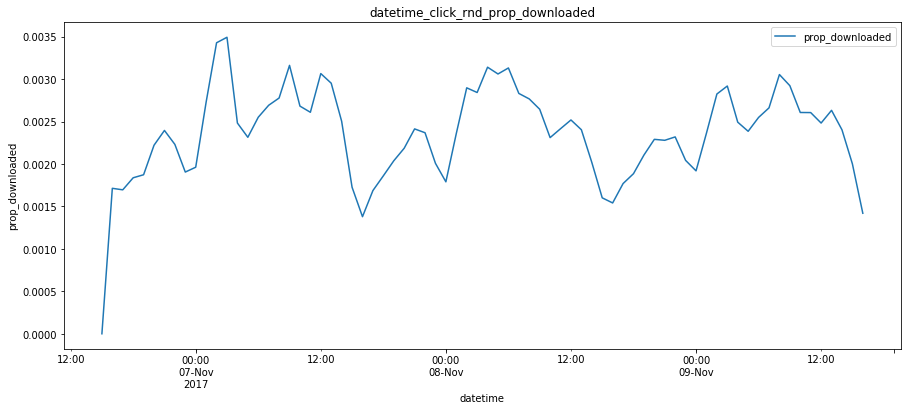

In [20]:
# plot
title = section + "_" + fea + "_prop_downloaded"

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 1, 1)
prop_downloaded[["prop_downloaded"]].plot(ax=ax1)
ax1.set_ylabel(ylabel="prop_downloaded")
ax1.set_xlabel(xlabel="datetime")

ax1.set_title(label=title)
fig.savefig(fname=str(data_Path / "plot" / title))

# time

時刻（時間単位）に対するクリック数

In [21]:
section = "time"

## click

In [22]:
fea = "click_hour"

In [23]:
# 時間単位に丸める
df_train[fea]=df_train["click_time"].dt.hour

In [38]:
len(df_train)

184903890

In [48]:
click_counts = df_train[[fea,"is_attributed"]].groupby(by=fea).count().reset_index()
click_counts.columns = [fea, "click_counts"]

In [49]:
click_counts.head()

,click_hour,click_counts
0,14,10281823
1,15,9226735
2,16,7078571
3,17,3913808
4,18,2258912


In [39]:
len(click_counts)

24

In [ ]:
click_counts.nlargest(n=24, columns=fea).head()

In [26]:
%%time
# save
click_counts.to_csv(filename=str(interim_data_Path / ("train_" + section + fea+"_" + "_click_counts-*.csv")),
                    index=False,
                   )

CPU times: user 7min 14s, sys: 27.5 s, total: 7min 42s
Wall time: 4min 27s


['/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/interim/train_timeclick_hour__click_counts-0.csv']

### plot

In [40]:
click_counts = pd.read_csv(filepath_or_buffer=str(interim_data_Path / ("train_" + section + fea+"_" + "_click_counts-0.csv")),
                           index_col=0,
                           parse_dates=[fea],
                          )

In [28]:
click_counts.head()

,click_counts
click_hour,
14,10281823
15,9226735
16,7078571
17,3913808
18,2258912


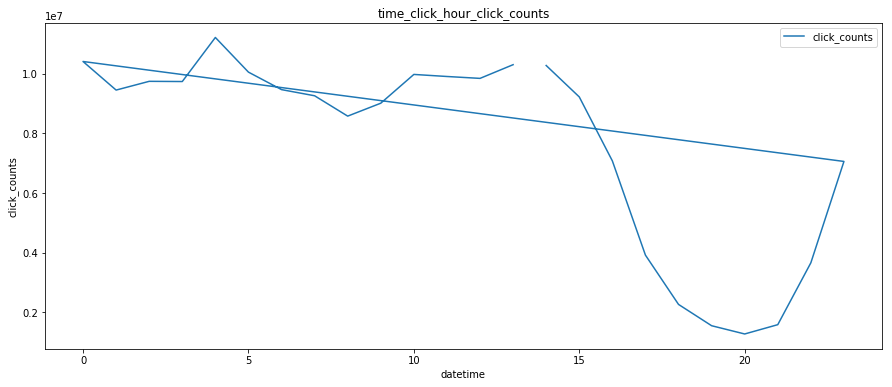

In [29]:
# plot
title = section + "_" + fea + "_click_counts"

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 1, 1)
click_counts[["click_counts"]].plot(ax=ax1)
ax1.set_ylabel(ylabel="click_counts")
ax1.set_xlabel(xlabel="datetime")

ax1.set_title(label=title)
fig.savefig(fname=str(data_Path / "plot" / title))

## prop_downloaded

In [30]:
prop_downloaded = df_train[[fea,"is_attributed"]].groupby(by=fea).mean().reset_index()

In [31]:
prop_downloaded.columns = [fea, "prop_downloaded"]

In [32]:
prop_downloaded.head()

,click_hour,prop_downloaded
0,14,0.002100
1,15,0.001430
2,16,0.001709
3,17,0.001773
4,18,0.001938


In [33]:
%%time
# save
prop_downloaded.to_csv(filename=str(interim_data_Path / ("train_"+section+"_"+fea+"_isAttributed_proportion-*.csv")),
                       index=False,
                      )

CPU times: user 7min 23s, sys: 27.5 s, total: 7min 51s
Wall time: 4min 30s


['/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/interim/train_time_click_hour_isAttributed_proportion-0.csv']

### plot

In [34]:
prop_downloaded = pd.read_csv(filepath_or_buffer=str(interim_data_Path / ("train_"+section+"_"+fea+"_isAttributed_proportion-0.csv")),
                              index_col=0,
                              parse_dates=[fea],
                             )

In [35]:
prop_downloaded.head()

,prop_downloaded
click_hour,
14,0.002100
15,0.001430
16,0.001709
17,0.001773
18,0.001938


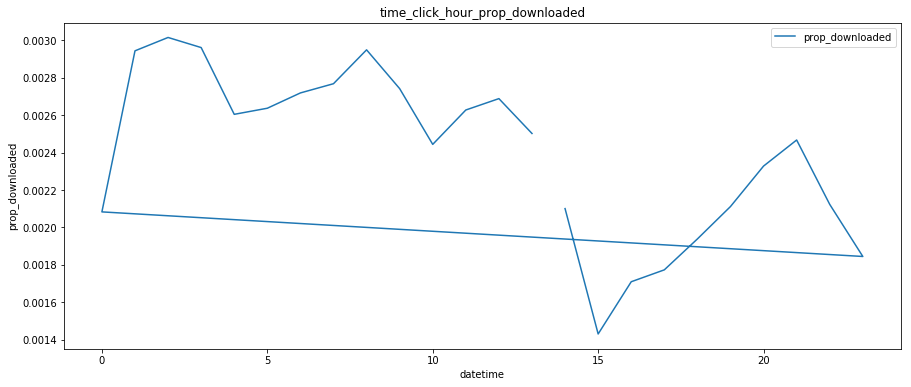

In [36]:
# plot
title = section + "_" + fea + "_prop_downloaded"

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 1, 1)
prop_downloaded[["prop_downloaded"]].plot(ax=ax1)
ax1.set_ylabel(ylabel="prop_downloaded")
ax1.set_xlabel(xlabel="datetime")

ax1.set_title(label=title)
fig.savefig(fname=str(data_Path / "plot" / title))

# IP

In [158]:
fea = "ip"
n_plot = 300

In [24]:
df_fea_val_counts_tmp = df_train[fea].value_counts()
print(type(df_fea_val_counts_tmp))

# SeriesからDataFrameに変換
df_fea_val_counts_tmp = df_fea_val_counts_tmp.to_frame()
print(type(df_fea_val_counts_tmp))

df_fea_val_counts = df_fea_val_counts_tmp.reset_index(drop=False)

del df_fea_val_counts_tmp

df_fea_val_counts.columns = [fea, 'counts']

# save df_ip_val_counts
df_fea_val_counts.to_csv(filename=str(interim_data_Path / ("train_"+fea+"_val_counts-*.csv")))

del df_fea_val_counts
gc.collect()

<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.DataFrame'>


12809

In [25]:
# load
tmp = dd.read_csv(urlpath=str(interim_data_Path / ("train_"+fea+"_val_counts-0.csv")),)
df_fea_val_counts = tmp.drop(labels=tmp.columns[0], axis=1)

In [26]:
df_fea_val_counts.head()

,ip,counts
0,5348,1238734
1,5314,1171448
2,73516,770451
3,73487,763854
4,53454,498186


In [27]:
df_train_tmp = dd.merge(left=df_train,
                        right=df_fea_val_counts,
                        how="left",
                        on=fea,
                       )

In [28]:
df_train_tmp.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,counts
0,83230,3,1,13,379,2017-11-06 14:32:21,NaT,0,25719
1,17357,3,1,19,379,2017-11-06 14:33:34,NaT,0,24133
2,35810,3,1,13,379,2017-11-06 14:34:12,NaT,0,9791
3,45745,14,1,13,478,2017-11-06 14:34:52,NaT,0,169149
4,161007,3,1,13,379,2017-11-06 14:35:08,NaT,0,1171


### proportion

In [48]:
n = 1000000  # 1000000 > 277396
#proportion = df_train_tmp[[fea, 'is_attributed']].groupby(by=fea).mean().reset_index().nlargest(n=n, columns='is_attributed').reset_index(drop=True)
proportion = df_train_tmp[[fea, 'is_attributed']].groupby(by=fea).mean().reset_index()
proportion.columns = [fea, "prop_downloaded"]

In [36]:
proportion.head()

,ip,prop_downloaded
0,9,0.001489
1,10,0.002542
2,19,0.004728
3,20,0.000670
4,25,0.004484


In [104]:
len(proportion)

277396

In [49]:
# save
proportion.to_csv(filename=str(interim_data_Path / ("train_"+fea+"_isAttributed_proportion-*.csv")))

['/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/interim/train_ip_isAttributed_proportion-0.csv']

#### load proportion

In [114]:
# load
#tmp = dd.read_csv(urlpath=str(interim_data_Path / ("train_"+fea+"_isAttributed_proportion-0.csv")),)
#proportion = tmp.drop(labels=tmp.columns[0], axis=1)
#
proportion = pd.read_csv(filepath_or_buffer=str(interim_data_Path / ("train_"+fea+"_isAttributed_proportion-0.csv")),
                         index_col=0,
                        )

### counts

In [106]:
n = 1000000  # 1000000 > 277396
counts = df_train_tmp[[fea, 'is_attributed']].groupby(by=fea).count().reset_index().nlargest(n=n, columns='is_attributed').reset_index(drop=True)
counts.columns = [fea, "click_count"]

In [107]:
counts.head()

,ip,click_count
0,5348,1238734
1,5314,1171448
2,73516,770451
3,73487,763854
4,53454,498186


In [108]:
len(counts)

277396

In [109]:
# save
counts.to_csv(filename=str(interim_data_Path / ("train_"+fea+"_isAttributed_counts-*.csv")))

['/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/interim/train_ip_isAttributed_counts-0.csv']

#### load counts

In [115]:
# load
#tmp = dd.read_csv(urlpath=str(interim_data_Path / ("train_"+fea+"_isAttributed_counts-0.csv")),)
#counts = tmp.drop(labels=tmp.columns[0], axis=1)
#
counts = pd.read_csv(filepath_or_buffer=str(interim_data_Path / ("train_"+fea+"_isAttributed_counts-0.csv")),
                     index_col=0,
                    )

### Head

## Merge

In [116]:
df_merge = counts.merge(right=proportion, on=fea, how='left', )
df_merge.columns = [fea, 'click_count', 'prop_downloaded']

In [117]:
df_merge.head()

,ip,click_count,prop_downloaded
0,5348,1238734,0.001889
1,5314,1171448,0.001878
2,73516,770451,0.001330
3,73487,763854,0.001428
4,53454,498186,0.000275


## Plot

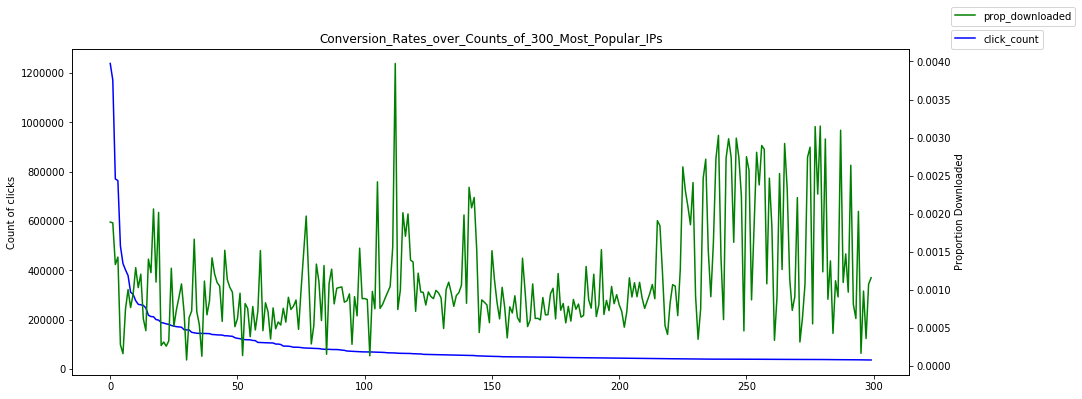

In [159]:
title = "Conversion_Rates_over_Counts_of_300_Most_Popular_"+fea.upper()+"s"

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 1, 1)


ax1.set_yscale("linear")
ax1.yaxis.tick_left()
df_merge[['click_count']][:n_plot].plot(ax=ax1, color="blue",)
ax1.yaxis.set_label_position("left")
ax1.set_ylabel(ylabel='Count of clicks')
ax1.legend(loc=3, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

ax2 = ax1.twinx()
ax2.yaxis.tick_right()
df_merge[['prop_downloaded']][:n_plot].plot(ax=ax2, color="green",)
ax2.yaxis.set_label_position("right")
ax2.set_ylabel(ylabel='Proportion Downloaded')
ax2.legend(loc=3, bbox_to_anchor=(1.05, 1 + 0.07), borderaxespad=0.)

ax2.set_title(title)
ax2.set_xlabel("Sort by " + fea)
#ax.legend(loc="best")
#ax.set_ylabel('Proportion Downloaded')
#plt.show()
fig.savefig(fname=str(data_Path / "plot" / title))
plt.show()


In [119]:
print(df_merge[:20])

        ip  click_count  prop_downloaded
0     5348      1238734         0.001889
1     5314      1171448         0.001878
2    73516       770451         0.001330
3    73487       763854         0.001428
4    53454       498186         0.000275
5   114276       427453         0.000159
6    26995       401495         0.000747
7    95766       378693         0.001001
8    17149       310996         0.000765
9   105475       302192         0.000943
10  100275       276799         0.001290
11   43793       261970         0.001027
12  105560       260049         0.001204
13   86767       257649         0.000617
14  111025       247187         0.000461
15  137052       217614         0.001402
16  201182       212448         0.001224
17    5178       211556         0.002061
18   49602       200053         0.001100
19    5147       197994         0.002015


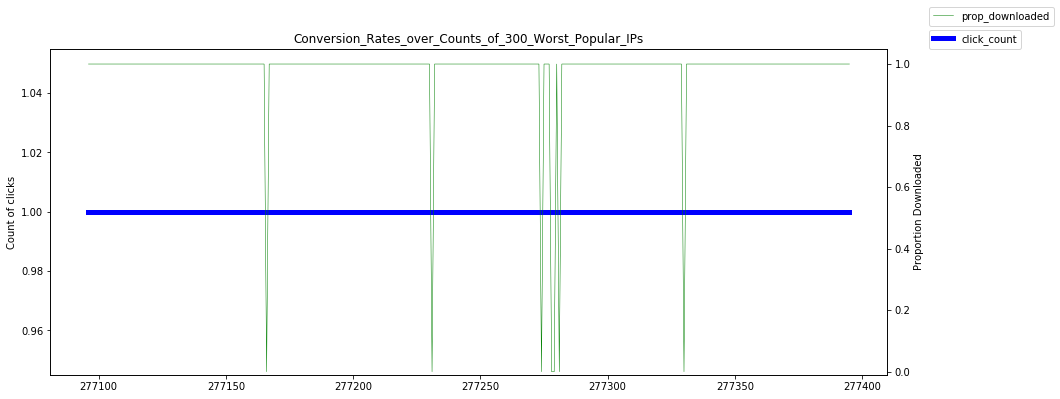

In [160]:
title = "Conversion_Rates_over_Counts_of_300_Worst_Popular_"+fea.upper()+"s"

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 1, 1)

ax1.set_yscale("linear")
ax1.yaxis.tick_left()
df_merge[['click_count']][-n_plot:].plot(ax=ax1, color="blue", lw=5.0)
ax1.yaxis.set_label_position("left")
ax1.set_ylabel(ylabel='Count of clicks')
ax1.legend(loc=3, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
#ax1.set_ylim(bottom=-0.01, top=1.05*df_merge[['click_count']][-n:].max(axis=0)['click_count'])

ax2 = ax1.twinx()
ax2.yaxis.tick_right()
df_merge[['prop_downloaded']][-n_plot:].plot(ax=ax2, color="green", lw=0.5)
ax2.yaxis.set_label_position("right")
ax2.set_ylabel(ylabel='Proportion Downloaded')
ax2.legend(loc=3, bbox_to_anchor=(1.05, 1 + 0.07), borderaxespad=0.)

ax2.set_title(title)
ax2.set_xlabel("Sort by " + fea)
ax2.set_ylim(bottom=-0.01, top=1.05*df_merge[['prop_downloaded']][-n:].max(axis=0)['prop_downloaded'])


fig.savefig(fname=str(data_Path / "plot" / title))
plt.show()


In [157]:
print(df_merge[-20:])

            ip  click_count  prop_downloaded
277376  282627            1              1.0
277377  282456            1              1.0
277378  285035            1              1.0
277379  171686            1              1.0
277380  170335            1              1.0
277381  285108            1              1.0
277382  285117            1              1.0
277383  285127            1              1.0
277384  283596            1              1.0
277385  283562            1              1.0
277386  283556            1              1.0
277387  171639            1              1.0
277388  282071            1              1.0
277389  171951            1              1.0
277390  282115            1              1.0
277391  282135            1              1.0
277392  282140            1              1.0
277393  282254            1              1.0
277394  171782            1              1.0
277395  364750            1              1.0


In [77]:
gc.collect()

25835